In [2]:
import pandas as pd
import numpy as np,os,glob,matplotlib.pyplot as plt

df=pd.read_csv('kaggle_train.csv')


In [3]:
df

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.0000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.3750,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,33,40.0,0.7500,0.2500,0.0000,4.9469,8.5014,9.1298,90.0038,90.0023,90.0015,0.0381,3.7349
2396,2397,167,30.0,0.4167,0.5833,0.0000,4.9566,4.9562,13.4178,89.9938,90.0075,120.0007,0.0670,3.4915
2397,2398,206,80.0,0.4375,0.5625,0.0000,9.2204,9.2200,9.2199,90.0047,90.0046,89.9954,0.0906,3.2750
2398,2399,33,80.0,0.3125,0.1875,0.5000,10.6529,9.0954,9.7210,90.0015,89.9996,90.0004,0.2566,1.3915


### Train model on 80% data

In [14]:
def split(df,ratio):
    x1=df.loc[:int(ratio*df.shape[0]),:]
    x2=df.loc[int(ratio*df.shape[0]):,:]
    return x1,x2

In [15]:
df_train,df_test=split(df,0.8)

In [16]:
x=[list(df_train["percent_atom_al"]),list(df_train["percent_atom_ga"]),list(df_train["percent_atom_in"]),list(df_train["formation_energy_ev_natom"])]
y_true=df_train["bandgap_energy_ev"]
m=[0 for i in range(len(x))]

c=1
n=len(x)
alpha=0.001 # learning rate
e=[]
def calc_loss(y_pred,Y): #loss calculation
    er=0
    for i1,i2 in zip(y_pred,Y):
        er+=(i1-i2)**2
    return er
for iter in range(100):

    y_pred=[]

    for i1 in range(len(x[0])):
        pred=0
        for i2 in range(len(x)):
            pred+=m[i2]*x[i2][i1]
        pred+=c
        y_pred.append(pred)
    
    err=calc_loss(y_pred,y_true)
    print(err)
    se_m=[]
    for X in range(len(x)):
        se_m.append(sum([(x1-x2)*x3 for x1,x2,x3 in zip(y_pred,y_true,x[X])]))
    #now update m,c
    mnew=[m[k]-alpha*se_m[k]*(1/n) for k in range(len(m))] # updating slope m
    m=mnew
    se=sum([x1-x2 for x1,x2 in zip(y_pred,y_true)])
    c=c-alpha*se*(1/n) # updating intercept c
    e.append(err) # storing losses for different iterations


4057.4017143700057
1997.0177261730423
1650.7380632871623
1514.407920009983
1412.2534006883793
1322.8442191237764
1242.776297900956
1170.8342151981033
1106.14244806131
1047.9417545731058
995.5551732379165
948.3768781703569
905.864441130263
867.5321635397622
832.9451365746684
801.7139264263471
773.4898161956652
747.9605457946213
724.8464976864624
703.8972817933543
684.8886777904721
667.6198973797847
651.9111330525343
637.6013633552747
624.546387813142
612.6170674742673
601.6977495551374
591.6848569194746
582.485625139881
574.0169716972133
566.2044834892768
558.9815102678588
552.2883529189729
546.0715366614357
540.2831602777009
534.8803134208616
529.8245548744956
525.0814453874665
520.6201293733757
516.4129603618724
512.4351656242196
508.6645458744482
505.08120637643776
501.6673161712617
498.40689248292017
495.28560766851547
492.29061635445044
489.41040064708943
486.6346315271969
483.9540447353678
481.3603296327105
478.84602967970125
476.4044533180434
474.0295941675698
471.71605956398497


In [17]:
mnew # contains the result similar to np.lingalg.solve(A,B)

[2.0468462885132808,
 0.25405542477719756,
 -1.3931768389115144,
 -1.4997035859185217]

Text(0.5, 1.0, '     Learning curve for  linear regression')

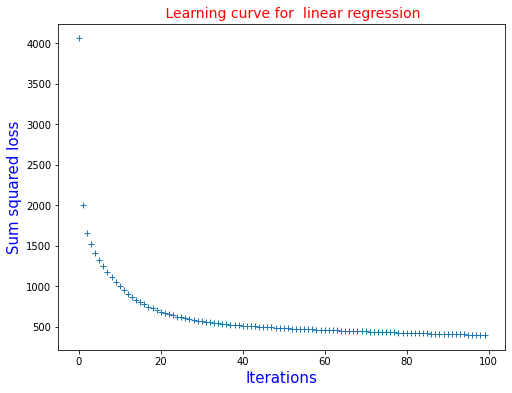

In [18]:
plt.figure(figsize=(8,6))
plt.plot(e,'+')
plt.ylabel('Sum squared loss',fontsize=15,color='blue')
plt.xlabel('Iterations',fontsize=15,color='blue')
plt.title('     Learning curve for  linear regression',fontsize=14,color='red')

### Check prediction on rest of the 20% data

In [38]:
x=[list(df_test["percent_atom_al"]),list(df_test["percent_atom_ga"]),list(df_test["percent_atom_in"]),list(df_test["formation_energy_ev_natom"])]
y_true=df_test["bandgap_energy_ev"]

y_prediction=[]


for x5 in range(len(x[0])):
    pred=0
    for x6 in range(len(mnew)):
        pred+=mnew[x6]*x[x6][x5]
    y_prediction.append(pred)

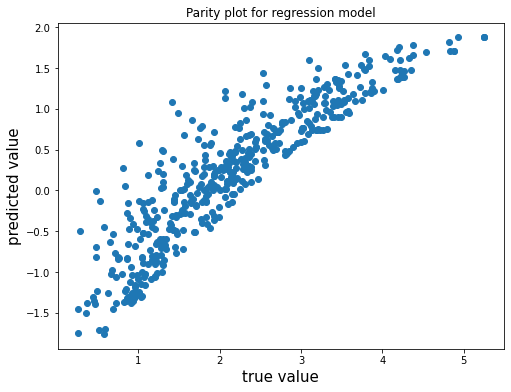

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(y_true,y_prediction)
plt.xlabel('true value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title('Parity plot for regression model')
plt.show()